## PUI Homework 10 

In [1]:
import pandas as pd
import numpy as np
import zipfile
import sklearn.cluster
from scipy.cluster.vq import kmeans2
import geopandas as gp

In [3]:
gdf = gp.read_file('nyc-zip-code-tabulation-areas-polygons.geojson')
print len(gdf.postalCode)
gdf.columns

262


Index([           u'@id', u'BLDGpostalCode',       u'CTY_FIPS',
             u'OBJECTID',        u'PO_NAME',          u'STATE',
              u'ST_FIPS',     u'Shape_Area',     u'Shape_Leng',
              u'borough',       u'geometry',     u'postalCode'],
      dtype='object')

In [4]:
gdf = gdf.drop_duplicates(['postalCode'])
print len(gdf.postalCode)

247


In [5]:
gdf.geometry.head()

0    POLYGON ((-73.86942457284175 40.74915687096787...
1    POLYGON ((-73.71068374074007 40.75004039450917...
2    POLYGON ((-73.70098278625547 40.73889569923034...
3    POLYGON ((-73.72270447144122 40.75373371438336...
4    POLYGON ((-73.81088634744755 40.72717187575918...
Name: geometry, dtype: object

In [6]:
ts_df = gdf.iloc[:,[-1]]
ts_df.columns = ['ZIP']
ts_df['ZIP'] = ts_df['ZIP'].astype(int)
ts_df.dtypes

/Users/sachinv/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


ZIP    int64
dtype: object

In [7]:
import re
fname = ['zbp94totals.zip','zbp95totals.zip','zbp96totals.zip','zbp97totals.zip','zbp98totals.zip',
         'zbp99totals.zip','zbp00totals.zip','zbp01totals.zip','zbp02totals.zip','zbp03totals.zip',
         'zbp04totals.zip','zbp05totals.zip','zbp06totals.zip','zbp07totals.zip','zbp08totals.zip',
         'zbp09totals.zip','zbp10totals.zip','zbp11totals.zip','zbp12totals.zip','zbp13totals.zip']


for j,f in enumerate(fname,1994):
    i = j - 1994
    zf = zipfile.ZipFile(fname[i])
    df = pd.read_csv(zf.open(fname[i].replace('.zip','.txt')))
    df = df.rename(columns=lambda x: re.sub('EST','est',x))
    #df = df.reindex(sorted(df.columns, key=lambda x: x.lower()))
    idx = df.columns.get_loc("est")
    #df = df.iloc[:,[0,-1]]
    df = df.iloc[:,[0,idx]]
    df.columns = ['ZIP', int(j)]
    #df = df.set_index('ZIP')
    df = df.drop_duplicates('ZIP')
    ts_df = pd.merge(left=ts_df, right=df, left_on='ZIP', right_on='ZIP', how='inner')

ts_df = ts_df.dropna()
ts_df.reset_index()
ts_df.head()


,ZIP,1994,1995,1996,1997,1998,1999,2000,2001,2002,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,11372,1229,1236,1292,1309,1351,1376,1409,1408,1463,...,1554,1539,1527,1545,1538,1572,1629,1647,1724,1759
1,11004,194,188,176,192,194,186,189,204,214,...,226,225,226,238,227,233,229,222,241,241
2,11040,1422,1414,1335,1344,1344,1350,1350,1341,1398,...,1406,1441,1454,1488,1503,1475,1494,1488,1510,1539
3,11426,326,219,209,198,203,217,213,217,207,...,221,226,226,228,226,237,248,256,266,258
4,11365,492,476,483,522,509,519,553,574,574,...,599,604,608,617,616,628,643,677,679,714


In [8]:
ts_df_s = ts_df.copy()
for i in range(len(ts_df)):
    mean_r = ts_df.iloc[i,1:].mean()
    sd_r = ts_df.iloc[i,1:].std()
    ts_df_s.iloc[i,1:] = ((ts_df.iloc[i,1:] - mean_r) / sd_r )

In [9]:
ts_df.head()

,ZIP,1994,1995,1996,1997,1998,1999,2000,2001,2002,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,11372,1229,1236,1292,1309,1351,1376,1409,1408,1463,...,1554,1539,1527,1545,1538,1572,1629,1647,1724,1759
1,11004,194,188,176,192,194,186,189,204,214,...,226,225,226,238,227,233,229,222,241,241
2,11040,1422,1414,1335,1344,1344,1350,1350,1341,1398,...,1406,1441,1454,1488,1503,1475,1494,1488,1510,1539
3,11426,326,219,209,198,203,217,213,217,207,...,221,226,226,228,226,237,248,256,266,258
4,11365,492,476,483,522,509,519,553,574,574,...,599,604,608,617,616,628,643,677,679,714


In [10]:
ts_df_s.head()

,ZIP,1994,1995,1996,1997,1998,1999,2000,2001,2002,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,11372,-1.655922,-1.609997,-1.242597,-1.131065,-0.855516,-0.691498,-0.474995,-0.481556,-0.120717,...,0.476307,0.377897,0.299168,0.417261,0.371336,0.594400,0.968360,1.086452,1.591627,1.821251
1,11004,-0.936298,-1.222191,-1.793976,-1.031596,-0.936298,-1.317488,-1.174542,-0.459811,0.016677,...,0.588462,0.540814,0.588462,1.160248,0.636111,0.922004,0.731409,0.397867,1.303194,1.303194
2,11040,-0.044411,-0.164848,-1.354162,-1.218670,-1.218670,-1.128343,-1.128343,-1.263834,-0.405722,...,-0.285285,0.241626,0.437336,0.949193,1.175012,0.753483,1.039521,0.949193,1.280394,1.716978
3,11426,3.256822,-0.396008,-0.737394,-1.112918,-0.942225,-0.464285,-0.600839,-0.464285,-0.805671,...,-0.327731,-0.157038,-0.157038,-0.088760,-0.157038,0.218487,0.594012,0.867120,1.208506,0.935398
4,11365,-1.340050,-1.574503,-1.471930,-0.900449,-1.090943,-0.944409,-0.446195,-0.138474,-0.138474,...,0.227860,0.301127,0.359740,0.491620,0.476967,0.652807,0.872608,1.370822,1.400128,1.912996


In [11]:
(Nzipcodes, Ntiestamps) = ts_df_s.shape
ts_df_s.shape

(230, 21)

In [12]:
# for i in range(Nzipcodes):
#     print df3.iloc[i,1:].std(),
#     print df3.iloc[i,1:].mean()

In [13]:
import matplotlib.pyplot as plt
%pylab inline

Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


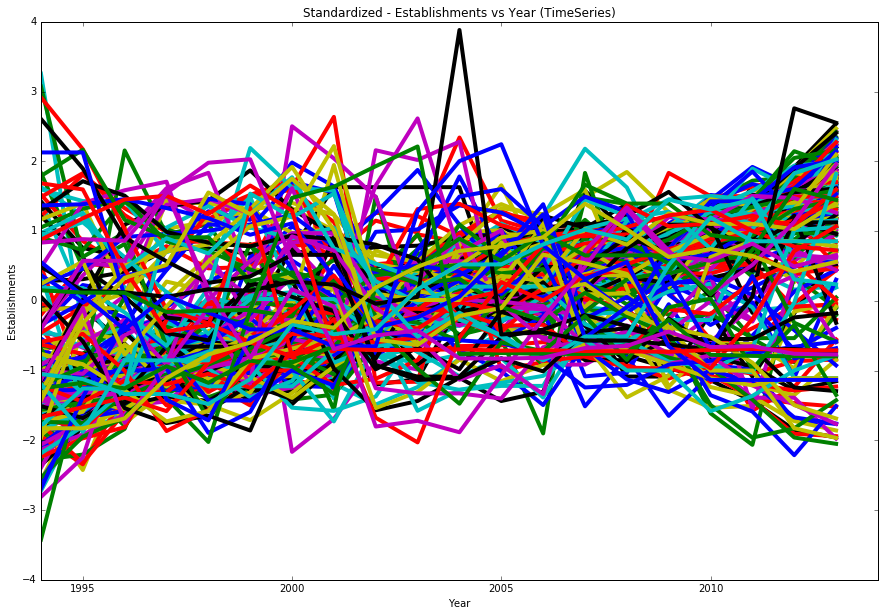

In [14]:
plt.figure(figsize=(15,10))
plt.xlim(1994,2014)
for i in range(Nzipcodes):
    plt.plot(range(1994,2014),ts_df_s.iloc[i,1:], lw=4)
plt.title('Standardized - Establishments vs Year (TimeSeries)')
plt.ylabel('Establishments')
plt.xlabel('Year')


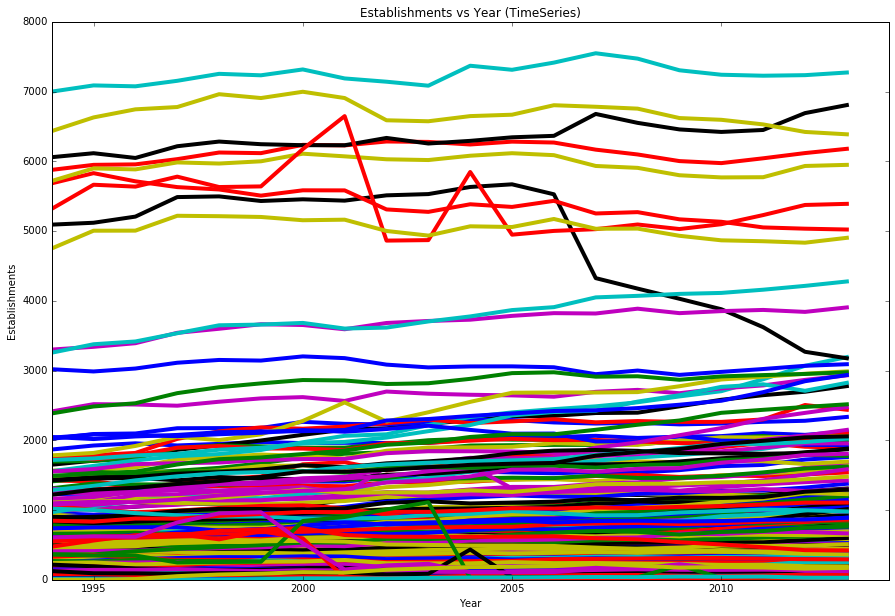

In [15]:
plt.figure(figsize=(15,10))
plt.xlim(1994,2014)
for i in range(Nzipcodes):
    plt.plot(range(1994,2014), ts_df.iloc[i,1:], lw=4)
plt.title('Establishments vs Year (TimeSeries)')
plt.ylabel('Establishments')
plt.xlabel('Year')


In [16]:
frame = ts_df_s.iloc[:, 1:]
frame.head()

,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,-1.655922,-1.609997,-1.242597,-1.131065,-0.855516,-0.691498,-0.474995,-0.481556,-0.120717,0.259804,0.476307,0.377897,0.299168,0.417261,0.371336,0.594400,0.968360,1.086452,1.591627,1.821251
1,-0.936298,-1.222191,-1.793976,-1.031596,-0.936298,-1.317488,-1.174542,-0.459811,0.016677,0.683760,0.588462,0.540814,0.588462,1.160248,0.636111,0.922004,0.731409,0.397867,1.303194,1.303194
2,-0.044411,-0.164848,-1.354162,-1.218670,-1.218670,-1.128343,-1.128343,-1.263834,-0.405722,-0.330449,-0.285285,0.241626,0.437336,0.949193,1.175012,0.753483,1.039521,0.949193,1.280394,1.716978
3,3.256822,-0.396008,-0.737394,-1.112918,-0.942225,-0.464285,-0.600839,-0.464285,-0.805671,-0.669117,-0.327731,-0.157038,-0.157038,-0.088760,-0.157038,0.218487,0.594012,0.867120,1.208506,0.935398
4,-1.340050,-1.574503,-1.471930,-0.900449,-1.090943,-0.944409,-0.446195,-0.138474,-0.138474,-0.021247,0.227860,0.301127,0.359740,0.491620,0.476967,0.652807,0.872608,1.370822,1.400128,1.912996


/Users/sachinv/anaconda/lib/python2.7/site-packages/matplotlib/axes/_axes.py:519: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


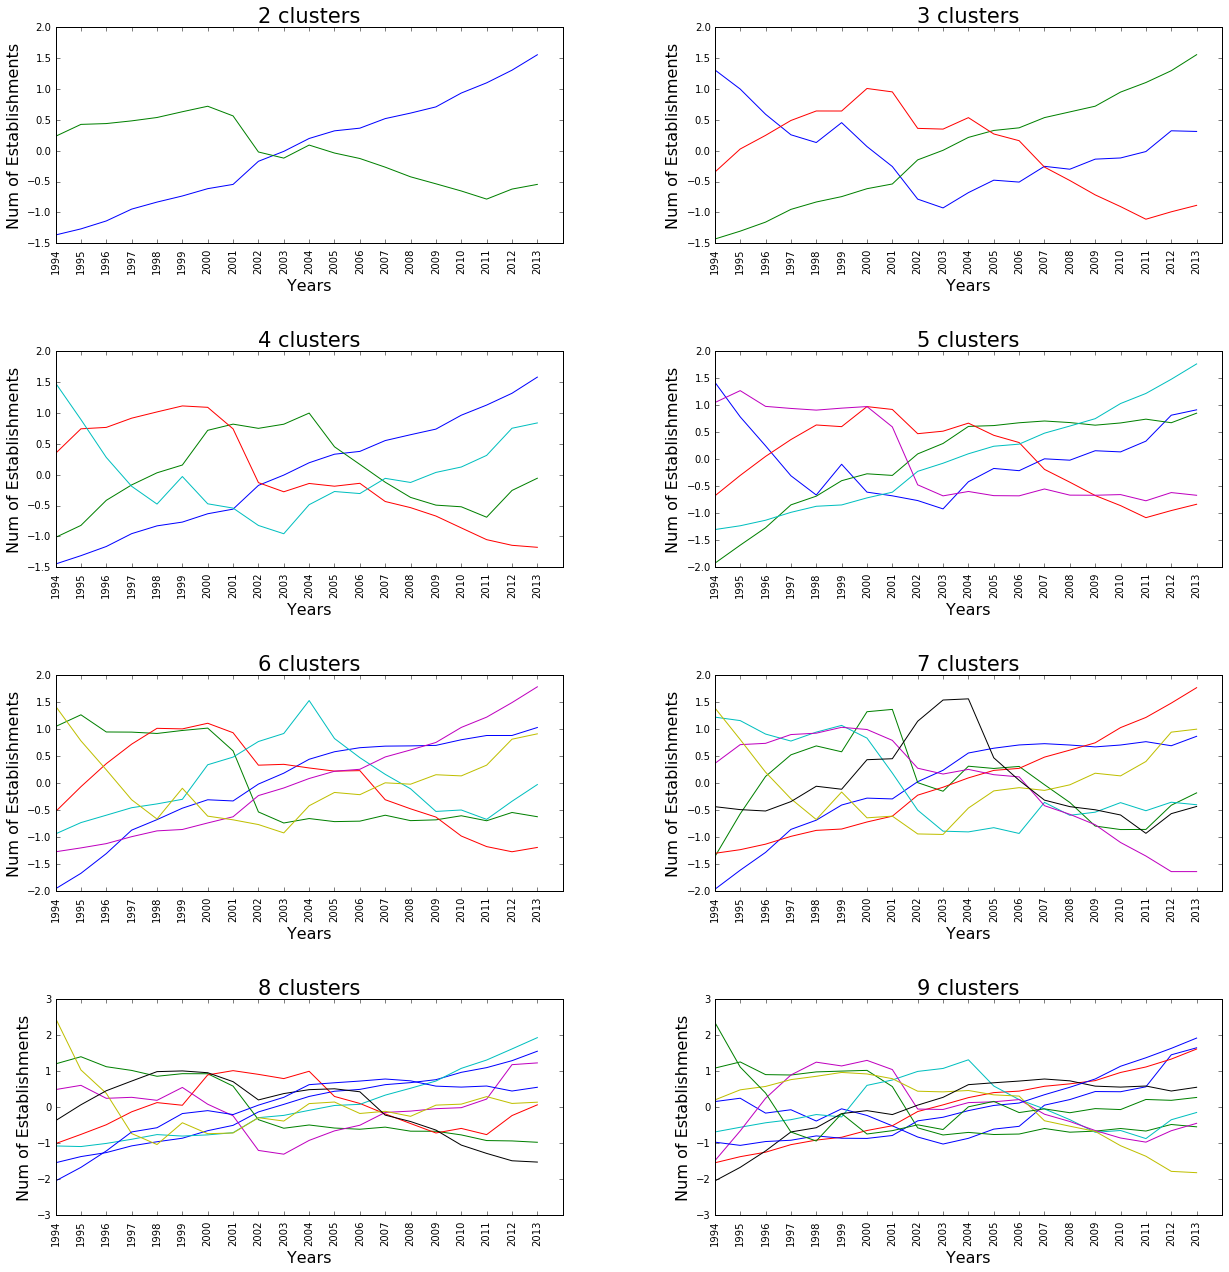

In [17]:
from sklearn.cluster import k_means
plt.figure(figsize=(18, 42), dpi=400)

p = 1
for i in range(2,10):

    est=k_means(frame,n_clusters = i)
    plt.subplot(5, 2, p)
    p += 1
    plt.plot(range(20), np.transpose(est[0]))
    plt.title(str(i)+' clusters', fontsize = 21)
    plt.ylabel('Num of Establishments', fontsize = 16)
    plt.xlabel('Years', fontsize = 16)
    plt.xticks(range(20), range(1994,2014), rotation = 90);
    plt.legend()
plt.subplots_adjust(wspace=.3, hspace=0.5, left=0, right=0.9, top=0.5, bottom=0)

[4 4 4 0 4 4 4 4 4 1 4 1 4 1 4 4 4 1 4 1 2 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 1
 4 0 0 1 4 4 4 2 4 4 4 4 4 4 1 4 4 4 4 4 4 4 4 4 4 4 4 4 1 4 4 4 4 4 1 4 4
 4 1 1 4 4 4 1 4 1 1 1 2 1 4 1 4 2 4 4 4 4 4 4 4 4 4 2 4 4 4 4 1 0 3 1 1 2
 4 2 4 1 4 4 4 4 4 1 3 4 1 4 4 2 4 3 1 1 4 4 4 4 4 4 4 4 4 4 4 4 4 4 2 4 1
 4 1 0 4 4 0 4 4 4 4 1 4 1 4 1 4 4 4 4 4 4 4 4 4 4 4 1 4 1 4 1 2 2 0 1 0 2
 3 2 2 2 2 1 3 3 2 0 4 2 3 4 0 3 4 0 2 3 0 2 3 2 3 3 3 1 3 4 2 3 0 4 0 1 0
 2 2 2 2 3 1 3 1]


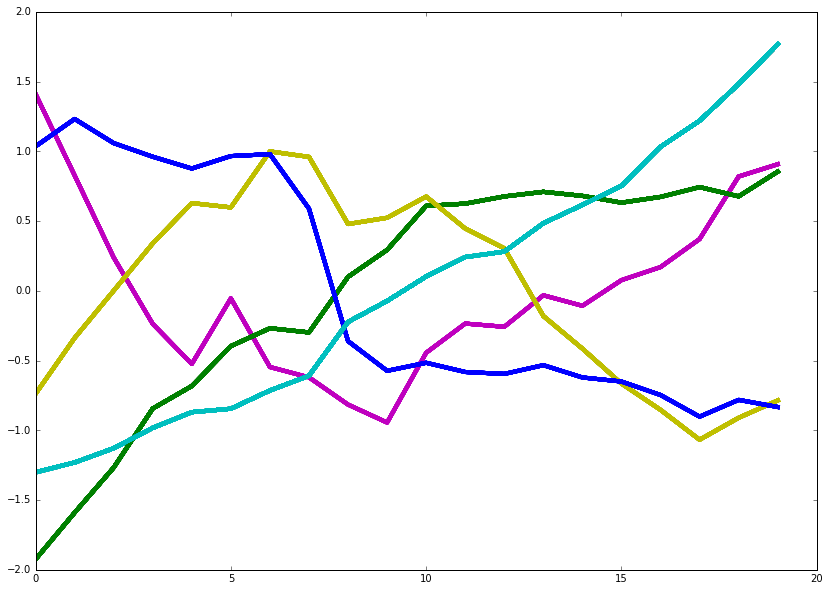

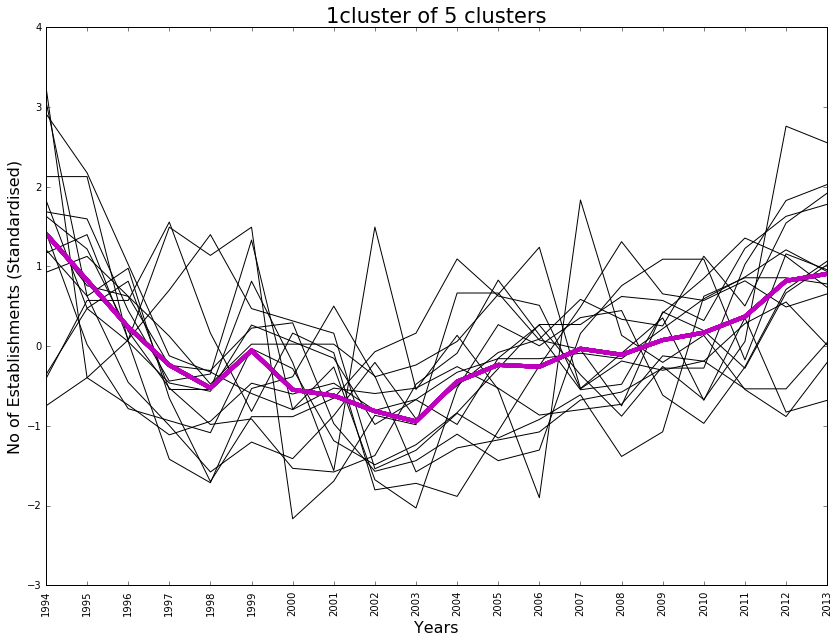

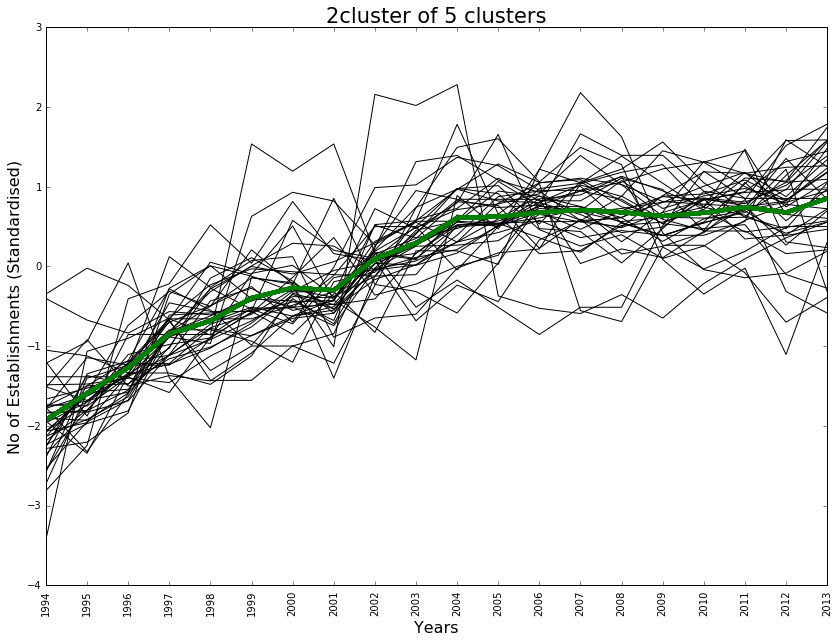

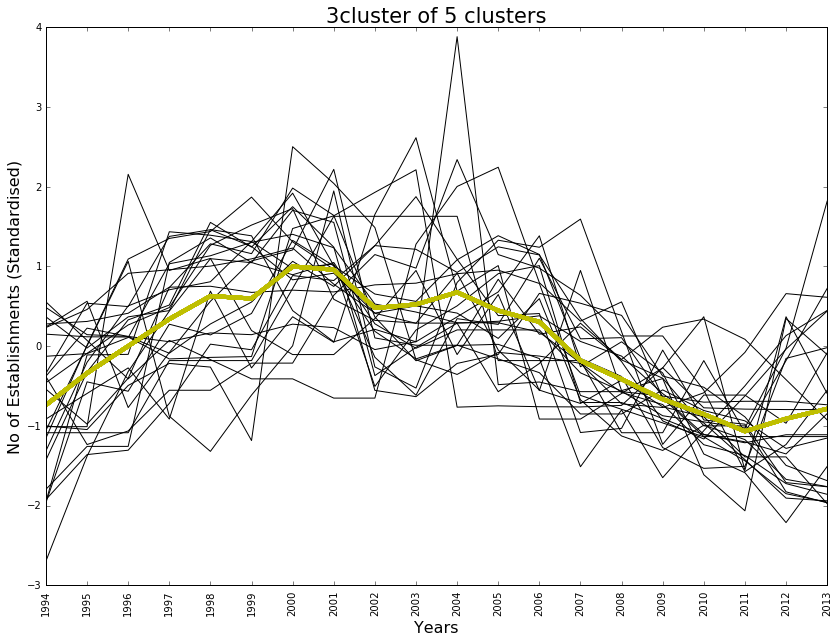

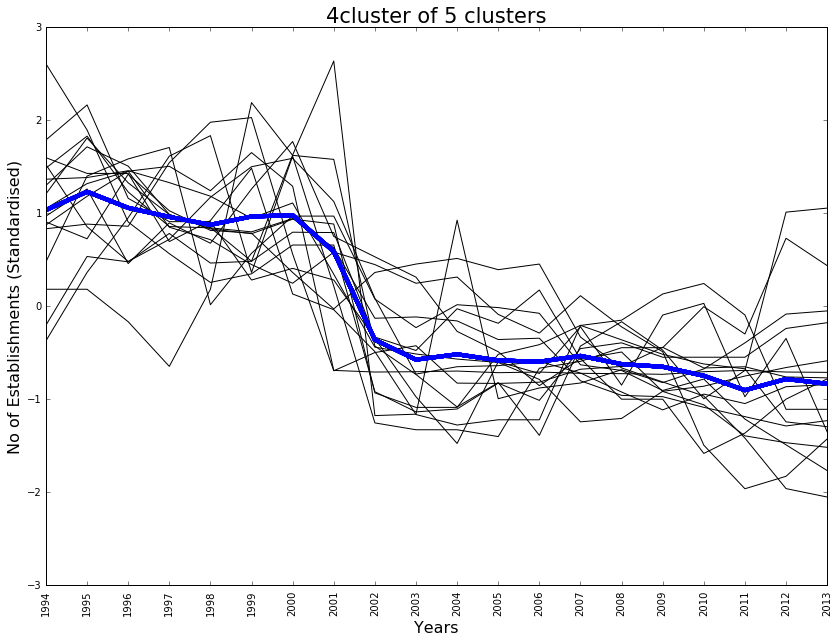

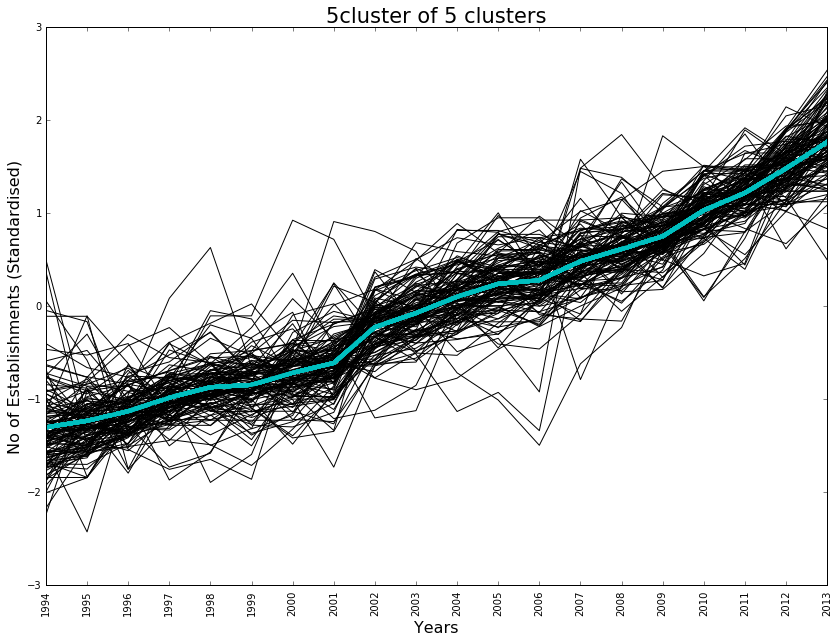

In [18]:
#cl = cluster_array
ts_df_s['cluster'] = est[1]
col=['m','g','y','b','c']
c = k_means(frame,n_clusters=5)
print c[1]
i = 0

fig0 = plt.figure(figsize=(14,10));
for m in range(5):
    i = 0
    fig1 = plt.figure(figsize=(14,10));
    ax0 = fig0.add_subplot(1,1,1);
    plt.ylabel('No of Establishments (Standardised)', fontsize = 16)
    plt.xlabel('Years', fontsize = 16)
    plt.title(str(m+1)+'cluster of 5 clusters', fontsize = 21)
    plt.xticks(range(20), range(1994,2014), rotation = 90);


    ax1 = fig1.add_subplot(1,1,1);


    plt.ylabel('No of Establishments (Standardised)', fontsize = 16)
    plt.xlabel('Years', fontsize = 16)
    plt.title(str(m+1)+'cluster of 5 clusters', fontsize = 21)
    plt.xticks(range(20), range(1994,2014), rotation = 90);
    for k in c[1]:
        if k==m:
            ax1.plot(range(20),frame.iloc[i,:],c='k')
            ax1.plot(range(20),c[0][k],c=col[m],lw=4)
            ax0.plot(range(20),c[0][k],c=col[m],lw=4)
            ax0.legend()
        i = i+1
        

In [19]:
gdf['zip'] = gdf['postalCode'].astype(float)
kdf = gdf.join(ts_df_s,rsuffix='zip',how='inner')

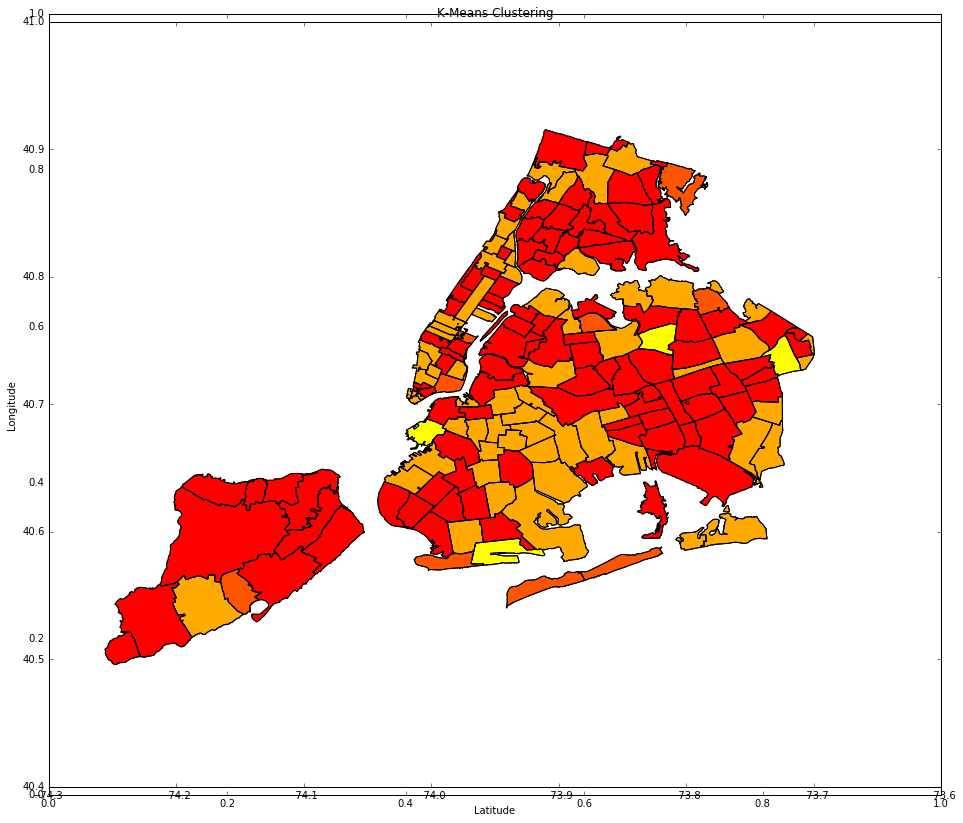

In [27]:
f, ax = plt.subplots(1, figsize=(16,14))
kdf.plot(column='cluster', scheme='QUANTILES', alpha=1, colormap='autumn')
#kdf.plot(column='cluster', scheme='QUANTILES', alpha=1, colormap='OrRd')
plt.xlabel('Latitude')
plt.ylabel('Longitude')
plt.title('K-Means Clustering')
plt.legend()

In [21]:
from sklearn.cluster import AgglomerativeClustering
agc = AgglomerativeClustering(n_clusters=5, compute_full_tree=True).fit(frame)

In [22]:
print agc.labels_

[2 2 2 3 2 2 3 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 3 0 4 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 4 2 2 2 2 2 4 2 2
 2 2 2 2 2 2 4 2 4 4 4 0 4 2 2 2 0 2 2 2 2 2 2 2 2 2 0 2 2 2 2 4 3 0 4 2 0
 2 0 2 4 2 2 2 2 2 4 1 2 0 2 2 0 2 1 2 4 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2 4
 2 2 3 2 2 3 2 2 2 2 2 2 2 2 4 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 4 0 0 1 0 3 0
 1 0 0 0 0 4 0 1 0 1 2 0 0 2 1 1 2 1 0 0 3 0 0 0 1 1 1 2 1 2 0 1 3 2 1 2 1
 0 0 0 0 1 2 1 4]


In [23]:
ts_df_s['cluster2'] = agc.labels_

In [24]:
a_df = gdf.join(ts_df_s,rsuffix='zip',how='inner')

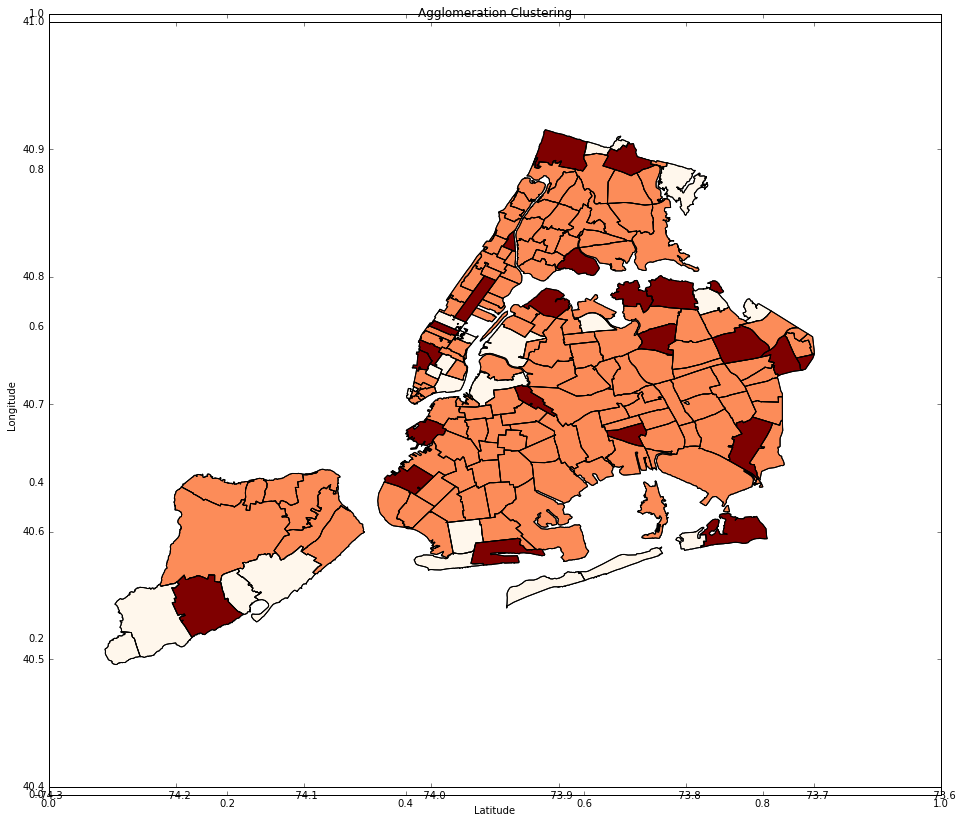

In [25]:
f, ax = plt.subplots(1, figsize=(16,14))
#a_df.plot(column='cluster2', scheme='QUANTILES', alpha=1, colormap='autumn')
#a_df.plot(column='cluster2', scheme='Equal_Interval', alpha=1, colormap='autumn')
a_df.plot(column='cluster2', scheme='QUANTILES', alpha=1, colormap='OrRd')



plt.xlabel('Latitude')
plt.ylabel('Longitude')
plt.title('Agglomeration Clustering')

### Both the K-means and Agglomerative clustering are showing different trends.
### It is difficult to assess the trends. There is some clustering in Staten Island and Manhattan but it is not conclusive.